**********************************************************************************************
# Creating Histograms of Landsat Images
Goal: The goal of this code is to create histograms from the raster values for multiple Landsat images.
**********************************************************************************************

## Import Modules

In [1]:
import sys, os, glob
import numpy as np
from osgeo import gdal, gdalnumeric, ogr, osr
import matplotlib
import matplotlib.pyplot as plt

## Read in the composite landsat image
Read in the Landsat images and find the number of images loaded

In [2]:
# Input the file paths
filepath = [r"C:\Users\rramirez.HBG-S1258\OneDrive - Science Systems and Applications, Inc\Documents\September\LC08_L1TP_052014_20180727_20180731_01_T1\LC08_L1TP_052014_20180727_20180731_01_T1.TIF",
            r"C:\Users\rramirez.HBG-S1258\OneDrive - Science Systems and Applications, Inc\Documents\LC08_L1TP_002071_20181017_20181030_01_T1 (1).TIF",
            #r"C:\Users\19282\OneDrive\Documents\SSAI\Landsat\LC08_L1TP_001088_20180924_20180929_01_T1.TIF"
           ]

l = len(filepath)

2


## Create function to reject outliers in band data

In [3]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

## Loop to Create histograms for each band from each Tif Image
The goal is to have 12 histograms with each histogram containing the corresponding bands from each image. For example, histogram 1 will have all of the band1s from wach Tif Image. 

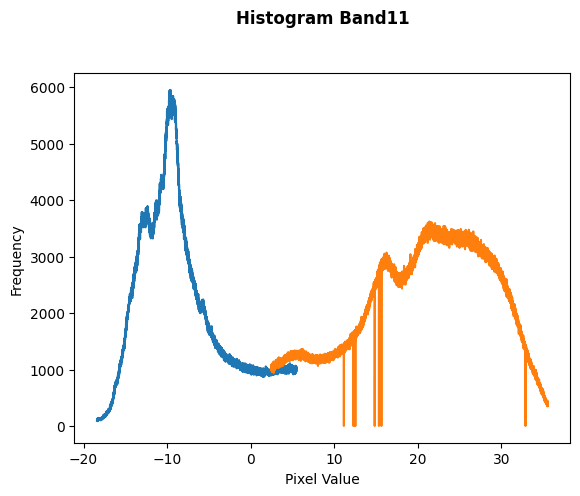

In [12]:
# Creating a loop over the 11 bands from Landsat
for j in range(1,12):
    plt.close()
    # Open the plot
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    title = 'Histogram Band' + str(j) 
    plt.title(title + '\n\n', fontweight ="bold")
    # Creating a loop to add corresponding bands to the histogram plot
    for i in filepath:
        # Open the raster data and create an array for the landmask
        raster = gdal.Open(i)
        landmask = raster.GetRasterBand(raster.RasterCount)
        landmask = landmask.ReadAsArray()
        landmask = landmask.flatten()
        # Open the raster data and create an array for the composited satelite image
        band = raster.GetRasterBand(j)
        temp_band = band.ReadAsArray()
        band = temp_band.flatten()
        # Remove the pixels corresponding to land values
        band = band[landmask<=0]
        # Remove any pixels that might distort results: background pixels, outliers, NaN
        band = np.delete(band, np.where(band <= np.min(band)))
        band = np.delete(band, np.where(band >= (np.max(band) - 5)))
        band = np.delete(band, np.isnan(band))
        band = reject_outliers(band)
        # Find the frequency of pixels values
        x, y = np.unique(band, return_counts=True)
        x_round = np.round_(x, decimals=3)
        # Create the histogram plot
        plt.plot(x_round,y)
        # Clean memory
        raster = None
    plt.savefig(title)